In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
#loading the data
data=pd.read_csv('/content/drive/MyDrive/Gradious projects/Smart deal recommendations for commuters/smart_deal_recommendations.csv')

In [ ]:
#reading the data and konwing about the data
data

,trip_purpose,travel_company,current_weather,ambient_temp,time_of_day,offer_type,deal_expiry_window,user_gender,user_age_group,relationship_status,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# checking the dtypes
#EDA
##Descriptive Stats
data.dtypes

,0
trip_purpose,object
travel_company,object
current_weather,object
ambient_temp,int64
time_of_day,object
offer_type,object
deal_expiry_window,object
user_gender,object
user_age_group,object
relationship_status,object


In [ ]:
#checking the columns names
data.columns

Index(['trip_purpose', 'travel_company', 'current_weather', 'ambient_temp',
       'time_of_day', 'offer_type', 'deal_expiry_window', 'user_gender',
       'user_age_group', 'relationship_status', 'num_dependents',
       'education_level', 'job_type', 'salary_range', 'vehicle_type',
       'visit_bar_freq', 'visit_cafe_freq', 'visit_takeout_freq',
       'visit_restaurant_low', 'visit_restaurant_high', 'min_gap_to_offer_5',
       'min_gap_to_offer_15', 'min_gap_to_offer_25', 'direction_match',
       'direction_mismatch', 'redeemed', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41'],
      dtype='object')

In [ ]:
#knowing the shape of the data
data.shape

(12684, 42)

In [ ]:
#removing the unnamed columns which are unwated to the model
data.drop(columns=['Unnamed: 26','Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41'],inplace=True)

In [ ]:
#checking the data shape after the removal of the unknown columns
data.shape

(12684, 26)

In [ ]:
# knowing the percentage of the data null values
data.isnull().mean()*100

,0
trip_purpose,0.000000
travel_company,0.000000
current_weather,0.000000
ambient_temp,0.000000
time_of_day,0.000000
offer_type,0.000000
deal_expiry_window,0.000000
user_gender,0.000000
user_age_group,0.000000
relationship_status,0.000000


In [ ]:
# vechcle_type column as 99% of null values which is not correct replace with startegies, delete
data.drop(columns=['vehicle_type'],inplace=True)

In [ ]:
#Having a look on the to know wheathe the column delete or not
data.shape

(12684, 25)

In [ ]:
# droping the duplication in the data
data.drop_duplicates(inplace=True)

In [ ]:
# checking the shape after dropping the duplications,
data.shape

(12610, 25)

In [ ]:
data.nunique()

,0
trip_purpose,3
travel_company,4
current_weather,3
ambient_temp,3
time_of_day,5
offer_type,5
deal_expiry_window,2
user_gender,2
user_age_group,8
relationship_status,5


In [ ]:
for i in data.columns:
  print(f"{i}:{data[i].unique()}")
  print()

trip_purpose:['No Urgent Place' 'Home' 'Work']

travel_company:['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

current_weather:['Sunny' 'Rainy' 'Snowy']

ambient_temp:[55 80 30]

time_of_day:['2PM' '10AM' '6PM' '7AM' '10PM']

offer_type:['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

deal_expiry_window:['1d' '2h']

user_gender:['Female' 'Male']

user_age_group:['21' '46' '26' '31' '41' '50plus' '36' 'below21']

relationship_status:['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

num_dependents:[1 0]

education_level:['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

job_type:['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical

In [ ]:
data.drop(columns=['min_gap_to_offer_5'],inplace=True)

**Handling the data rows**

*   Decided to do grouping the ages into under_20 and 20_to_40 and above_40
*   Making the salary range into min_range and max_range
*   Visiting based columns replace the numericals acc to the data manually, then missing values with staregy





In [ ]:
#grouping the ages into 3 sets

# for that i need to convert into into int using isdigit()

def age(a):
  if a.isdigit():
    return int(a)
  elif 'below' in a.lower():
    return 19
  elif 'plus' in a.lower():
    return 50
  else:
    return np.nan

data['numerical_age']=data['user_age_group'].apply(age)

def making_grp(age_group):
  if age_group<=19:
    return 'Teenage'
  elif age_group<=29:
    return 'Young'
  else:
    return 'Adult'

data['age_group']=data['numerical_age'].apply(making_grp)


In [ ]:
data['age_group']

,age_group
0,Young
1,Young
2,Young
3,Young
4,Young
...,...
12679,Young
12680,Young
12681,Young
12682,Young


In [ ]:
data.shape

(12610, 26)

In [ ]:
data.columns

Index(['trip_purpose', 'travel_company', 'current_weather', 'ambient_temp',
       'time_of_day', 'offer_type', 'deal_expiry_window', 'user_gender',
       'user_age_group', 'relationship_status', 'num_dependents',
       'education_level', 'job_type', 'salary_range', 'visit_bar_freq',
       'visit_cafe_freq', 'visit_takeout_freq', 'visit_restaurant_low',
       'visit_restaurant_high', 'min_gap_to_offer_15', 'min_gap_to_offer_25',
       'direction_match', 'direction_mismatch', 'redeemed', 'numerical_age',
       'age_group'],
      dtype='object')

In [ ]:
data_backup=data
# a backup data

In [ ]:
# drop the previous data columns of age
data.drop(columns=['user_age_group','numerical_age'],inplace=True)

In [ ]:
data.shape

(12610, 24)

In [ ]:
# Now with the salary spliting into min and max
# data are salary_range:['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
#'$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
#'Less than $12500']

def Spliting_salary(s):
    s = s.lower()
    if '-' in s:
        split = s.replace('$','').replace(',','').split('-')
        min_salary = int(split[0])
        max_salary = int(split[1])

    elif 'less' in s:
        # Example: "less than $50000"
        max_salary = int(s.split('$')[1].replace(',',''))
        min_salary = 0

    elif 'more' in s:
        # Example: "more than $70000"
        min_salary = int(s.split('$')[1].replace(',','').split()[0])
        max_salary = np.nan

    else:
        min_salary = np.nan
        max_salary = np.nan

    return pd.Series([min_salary, max_salary])


data[['min_salary','max_salary']]=data['salary_range'].apply(Spliting_salary)

In [ ]:
data.head()

,trip_purpose,travel_company,current_weather,ambient_temp,time_of_day,offer_type,deal_expiry_window,user_gender,relationship_status,num_dependents,...,visit_restaurant_low,visit_restaurant_high,min_gap_to_offer_15,min_gap_to_offer_25,direction_match,direction_mismatch,redeemed,age_group,min_salary,max_salary
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,Unmarried partner,1,...,4~8,1~3,0,0,0,1,1,Young,37500.0,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,Unmarried partner,1,...,4~8,1~3,0,0,0,1,0,Young,37500.0,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,Unmarried partner,1,...,4~8,1~3,1,0,0,1,1,Young,37500.0,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,Unmarried partner,1,...,4~8,1~3,1,0,0,1,0,Young,37500.0,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,Unmarried partner,1,...,4~8,1~3,1,0,0,1,0,Young,37500.0,49999.0


In [ ]:
data.columns

Index(['trip_purpose', 'travel_company', 'current_weather', 'ambient_temp',
       'time_of_day', 'offer_type', 'deal_expiry_window', 'user_gender',
       'relationship_status', 'num_dependents', 'education_level', 'job_type',
       'salary_range', 'visit_bar_freq', 'visit_cafe_freq',
       'visit_takeout_freq', 'visit_restaurant_low', 'visit_restaurant_high',
       'min_gap_to_offer_15', 'min_gap_to_offer_25', 'direction_match',
       'direction_mismatch', 'redeemed', 'age_group', 'min_salary',
       'max_salary'],
      dtype='object')

In [ ]:
data_backup=data

In [ ]:
data.drop(columns=['salary_range'],inplace=True)

In [ ]:
data.shape

(12610, 25)

In [ ]:
#working on this columns ['visit_bar_freq', 'visit_cafe_freq','visit_takeout_freq', 'visit_restaurant_low', 'visit_restaurant_high']

replace_text={
    'never':0,
    'less1':0.5,
    '1~3' :2,
    'gt8': 9,
    '4~8': 6
    }
def repl(data,col,replace_text):
    data[col]=data[col].map(replace_text)
rep_col=['visit_bar_freq', 'visit_cafe_freq','visit_takeout_freq', 'visit_restaurant_low', 'visit_restaurant_high']
for i in rep_col:
  repl(data,i,replace_text)

In [ ]:
data['visit_bar_freq'].unique()

array([0. , 0.5, 2. , 9. , nan, 6. ])

In [ ]:
data.shape

(12610, 25)

In [ ]:
data.head()

,trip_purpose,travel_company,current_weather,ambient_temp,time_of_day,offer_type,deal_expiry_window,user_gender,relationship_status,num_dependents,...,visit_restaurant_low,visit_restaurant_high,min_gap_to_offer_15,min_gap_to_offer_25,direction_match,direction_mismatch,redeemed,age_group,min_salary,max_salary
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,Unmarried partner,1,...,6.0,2.0,0,0,0,1,1,Young,37500.0,49999.0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,Unmarried partner,1,...,6.0,2.0,0,0,0,1,0,Young,37500.0,49999.0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,Unmarried partner,1,...,6.0,2.0,1,0,0,1,1,Young,37500.0,49999.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,Unmarried partner,1,...,6.0,2.0,1,0,0,1,0,Young,37500.0,49999.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,Unmarried partner,1,...,6.0,2.0,1,0,0,1,0,Young,37500.0,49999.0


In [ ]:
data.isnull().sum()

,0
trip_purpose,0
travel_company,0
current_weather,0
ambient_temp,0
time_of_day,0
offer_type,0
deal_expiry_window,0
user_gender,0
relationship_status,0
num_dependents,0


In [ ]:
data.dtypes

,0
trip_purpose,object
travel_company,object
current_weather,object
ambient_temp,int64
time_of_day,object
offer_type,object
deal_expiry_window,object
user_gender,object
relationship_status,object
num_dependents,int64


##Visual EDA

In [ ]:
#Now handling with nan and null elements
numerical_columns=data.select_dtypes(include=['float64','int64']).columns
categorical_columns=data.select_dtypes(include=['object']).columns

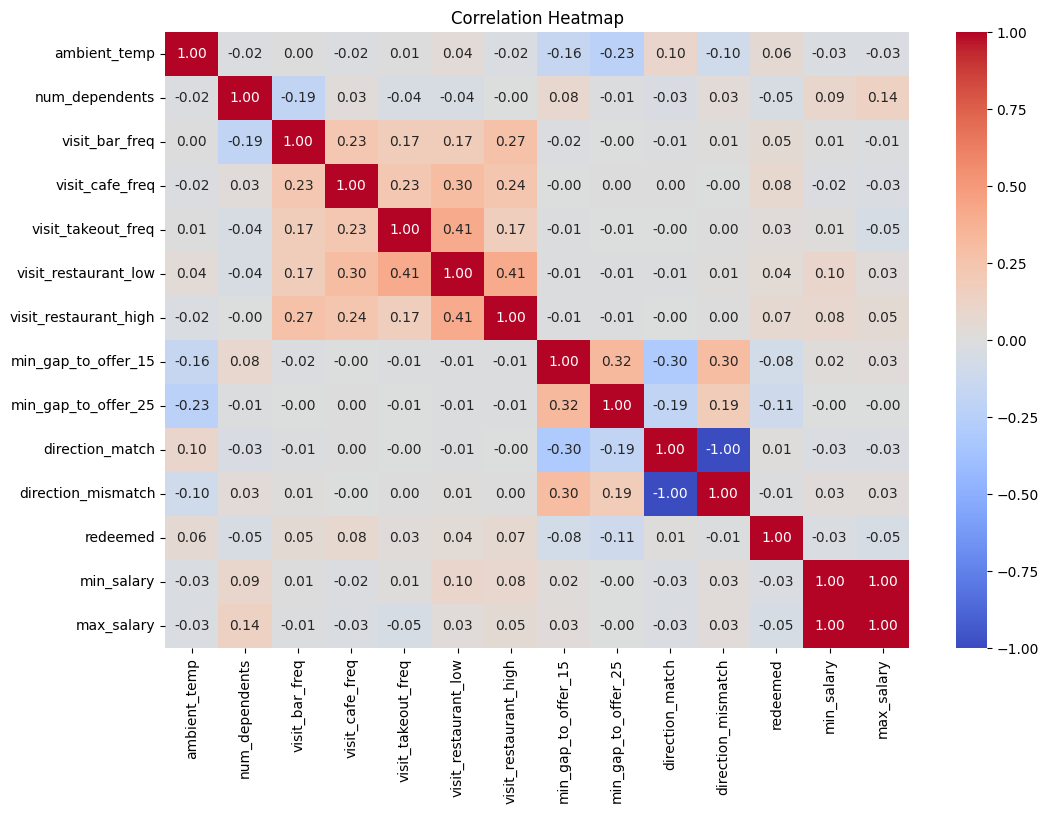

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#Above corr : remove one (direction_mismatch or direction Match) beacause high neg corr and also remove one (min_salary or max_salary) beacause of high pos corr

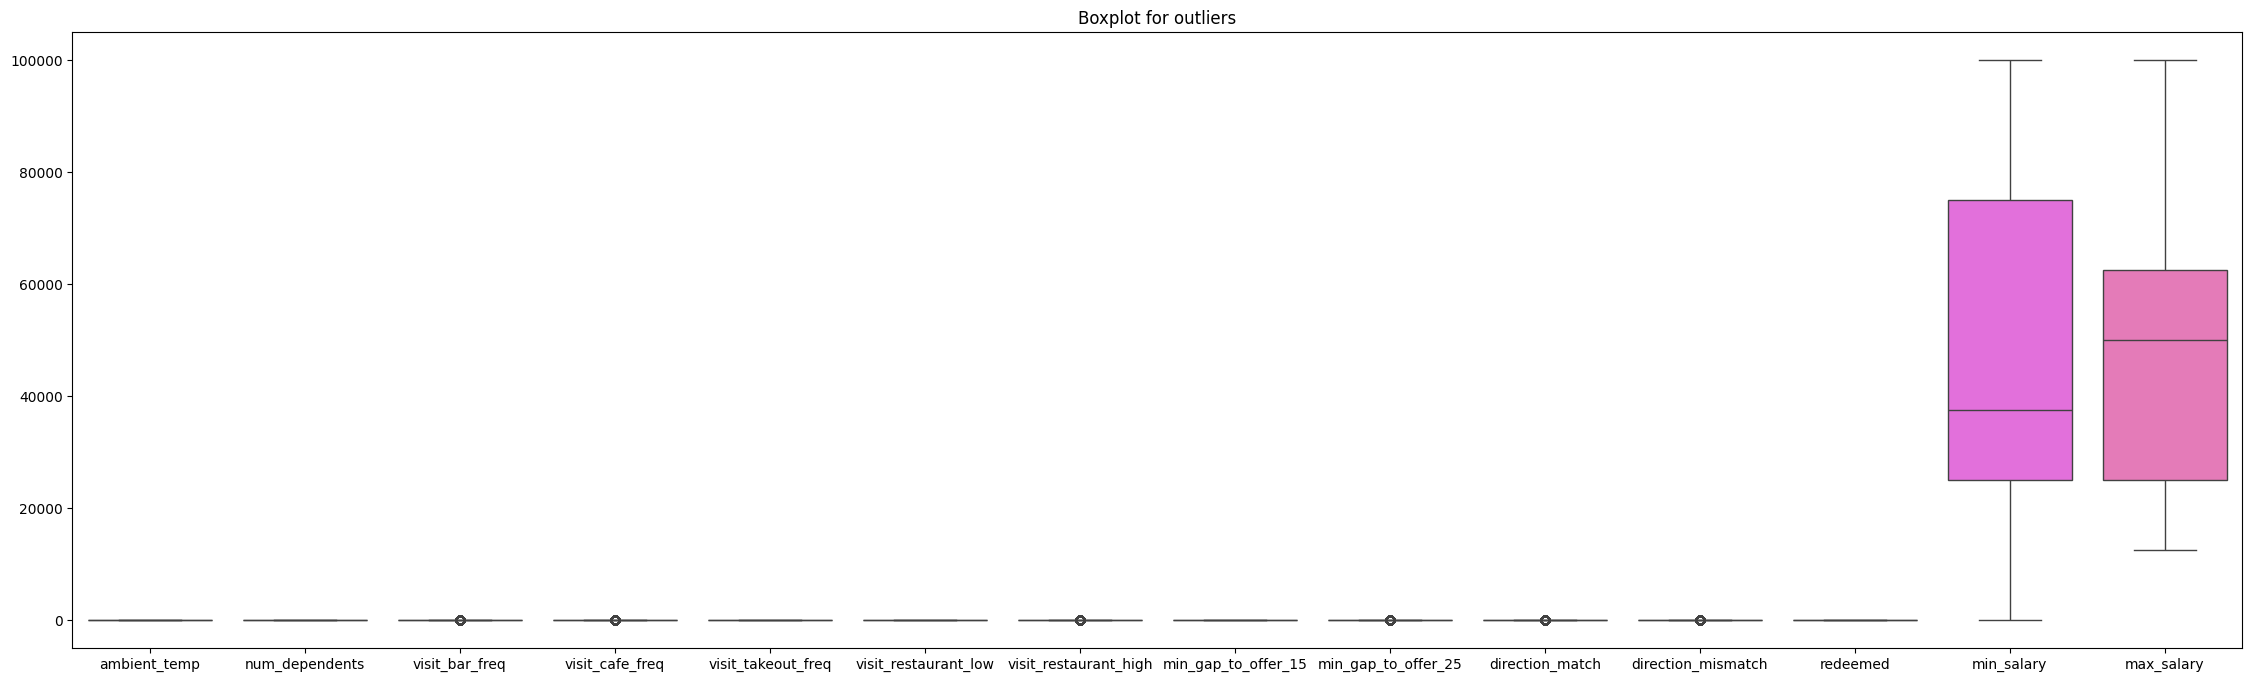

In [ ]:
plt.figure(figsize=(28,8))
sns.boxplot(data=data[numerical_columns])
plt.title("Boxplot for outliers")
plt.show()

# If i remove the max_salary then i need to handle outlier

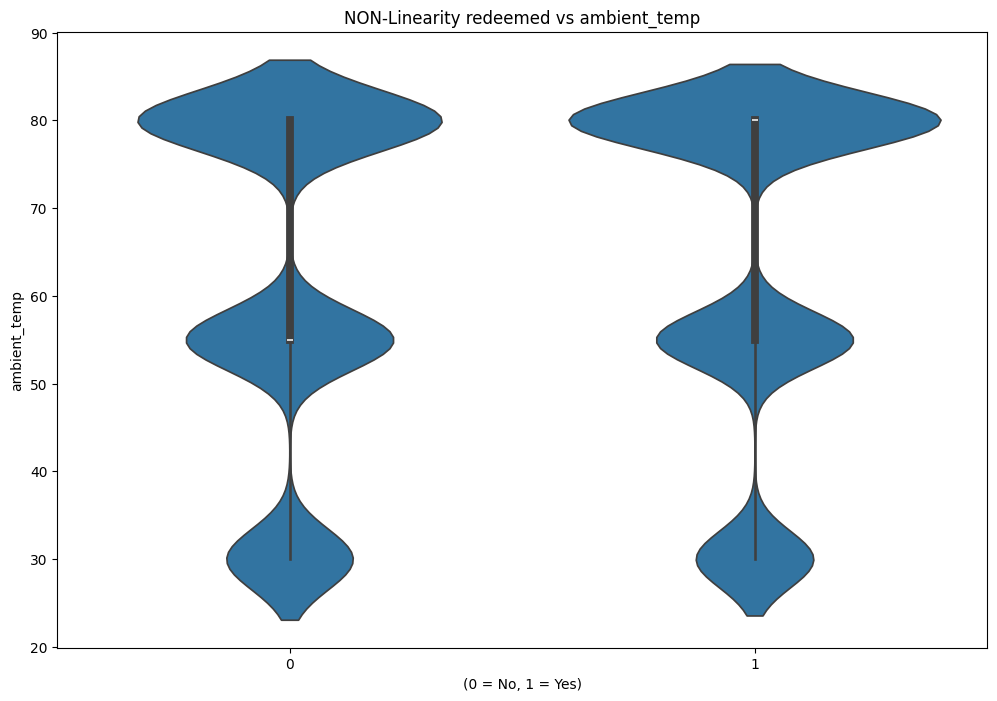

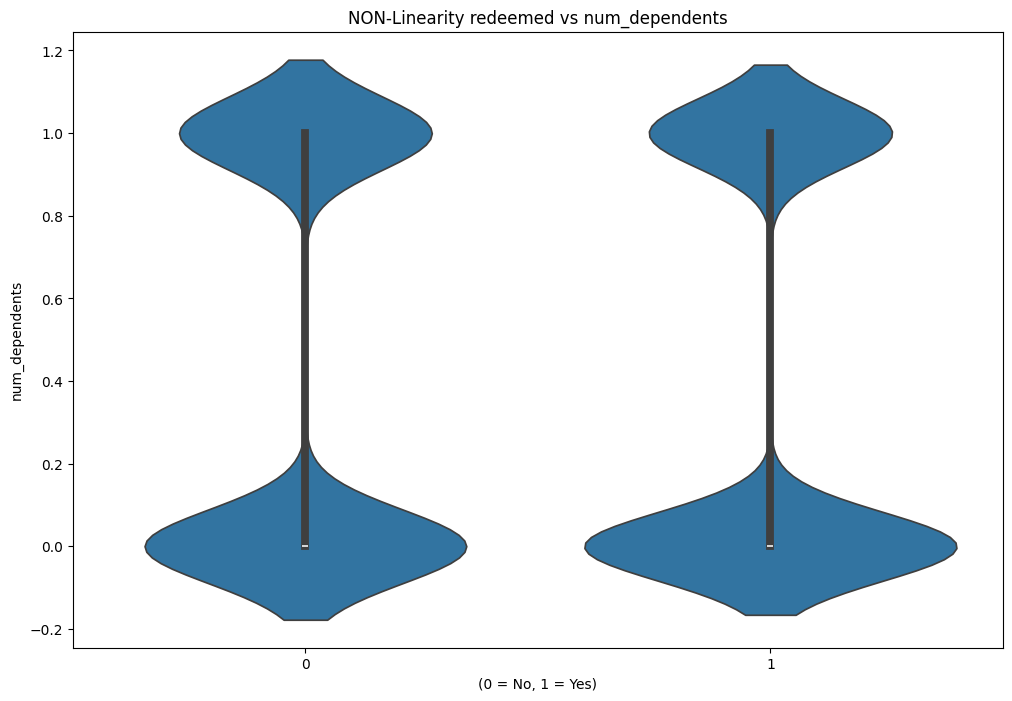

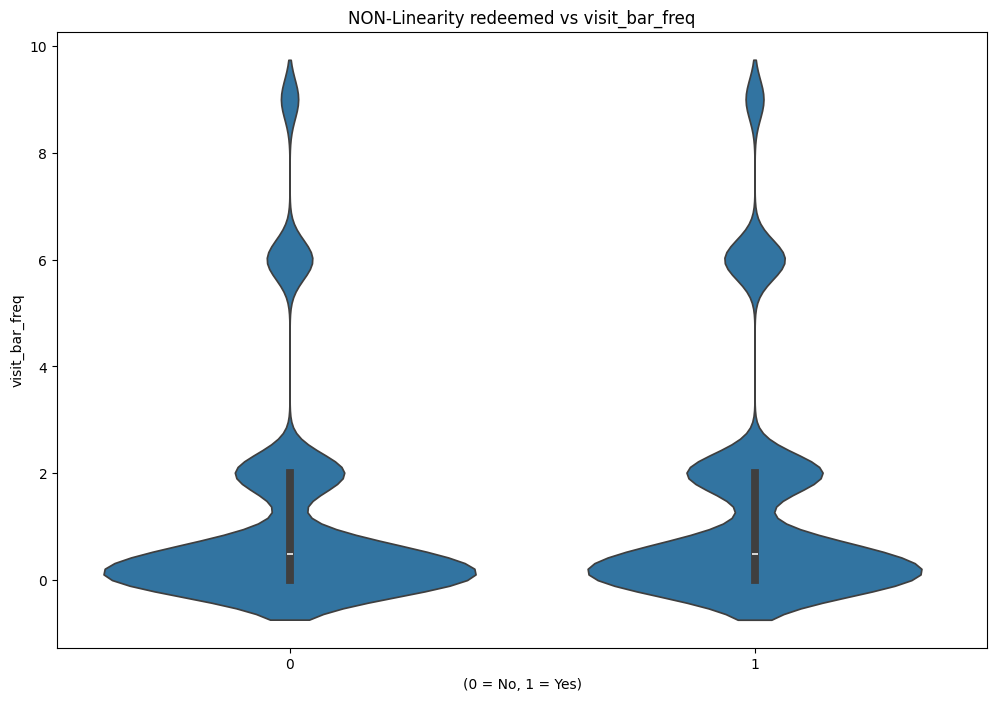

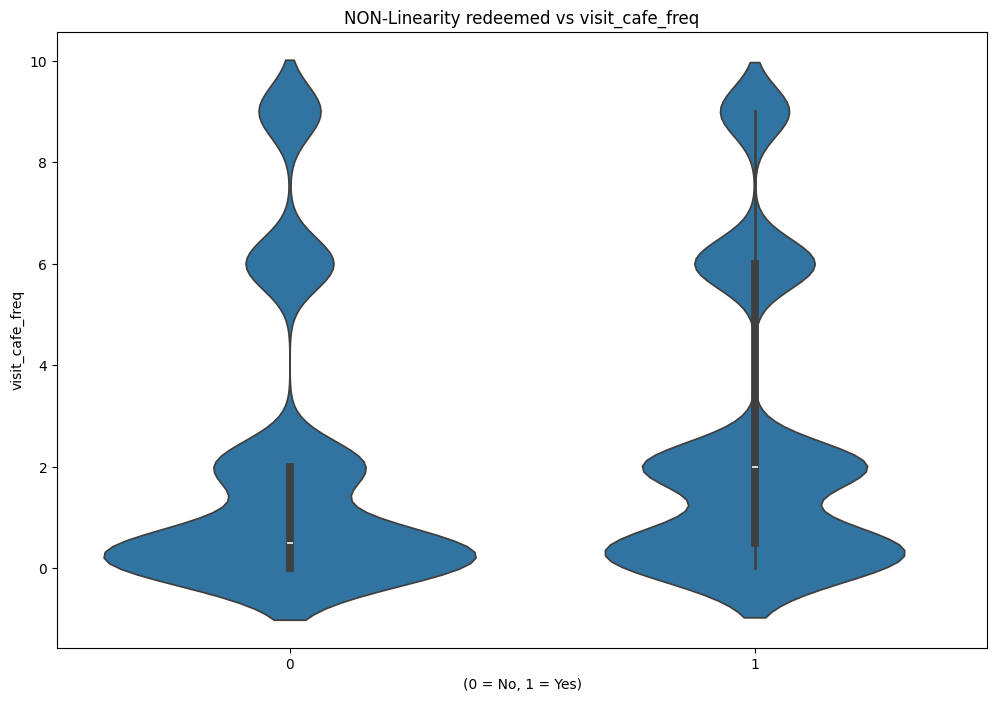

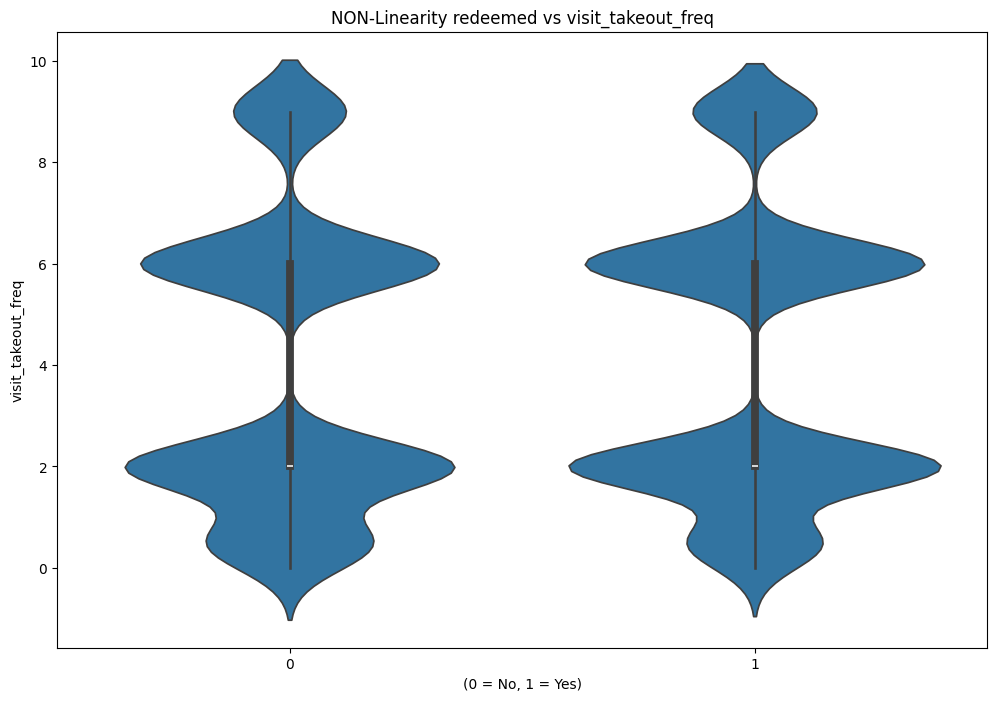

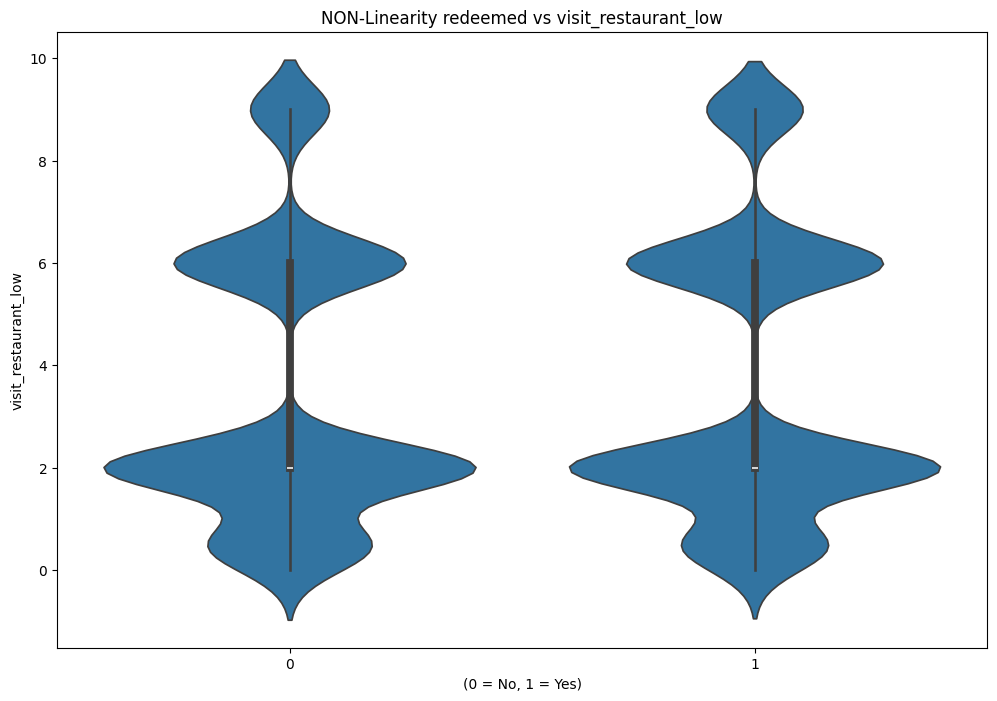

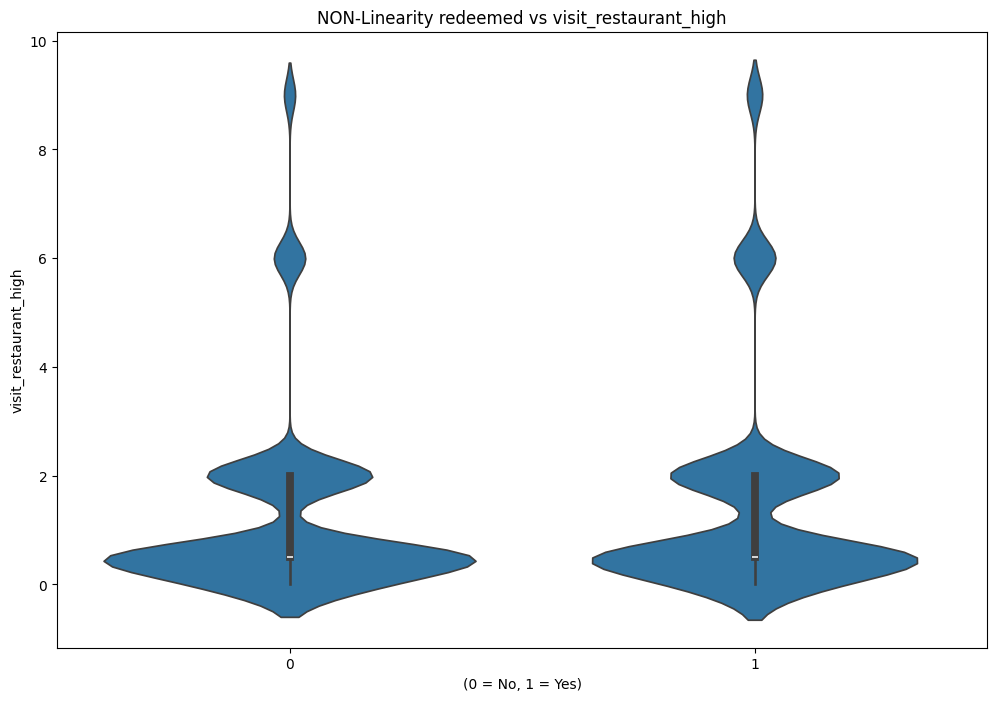

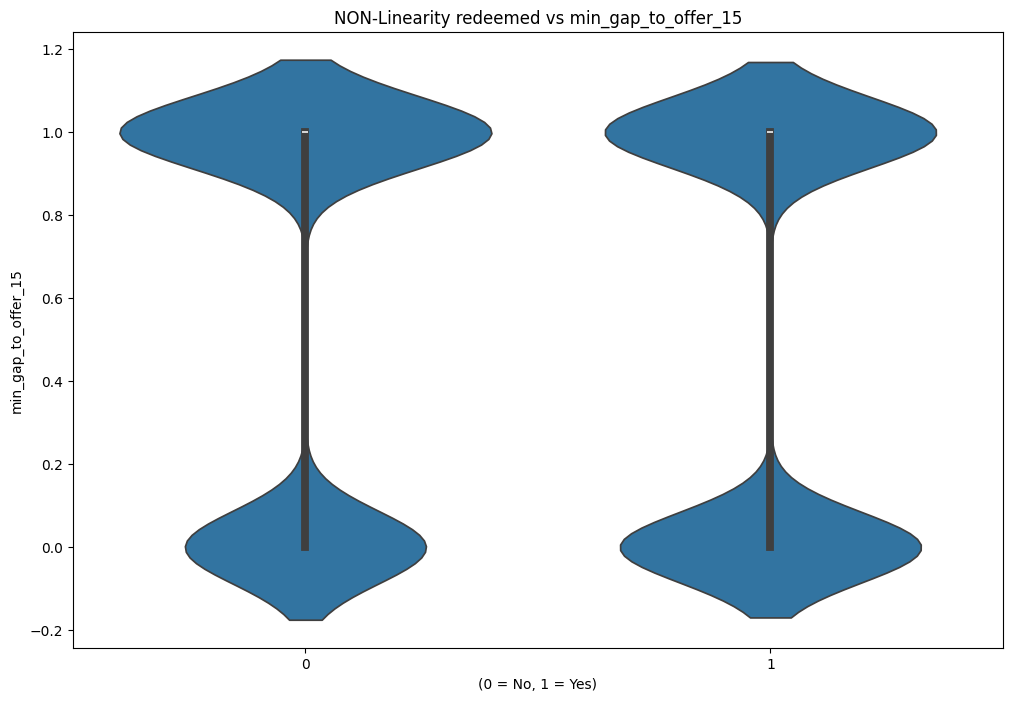

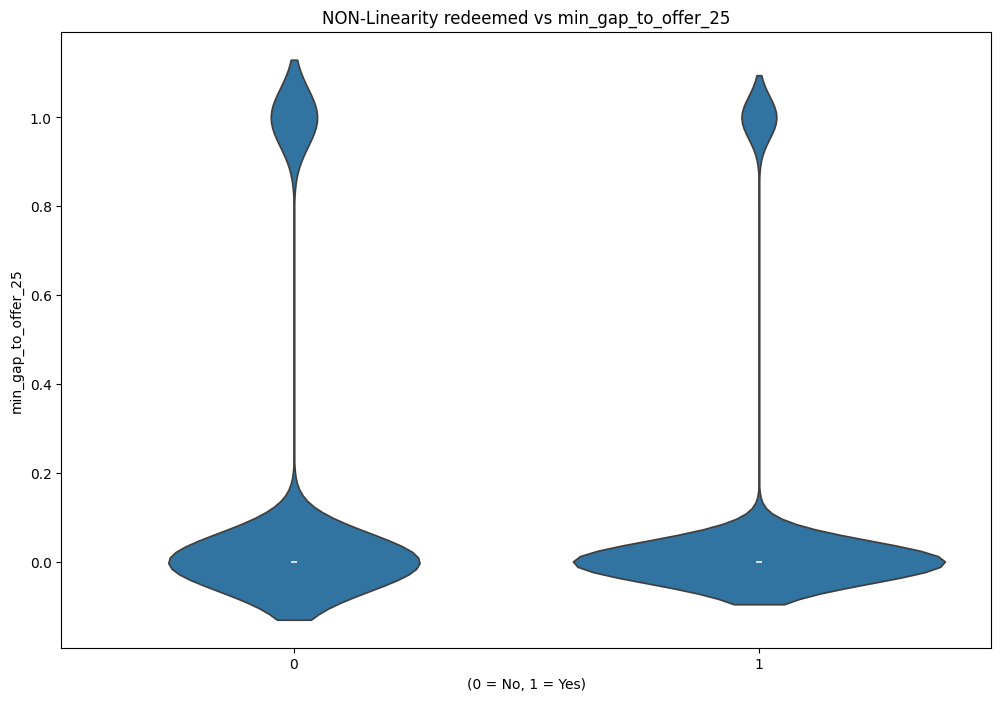

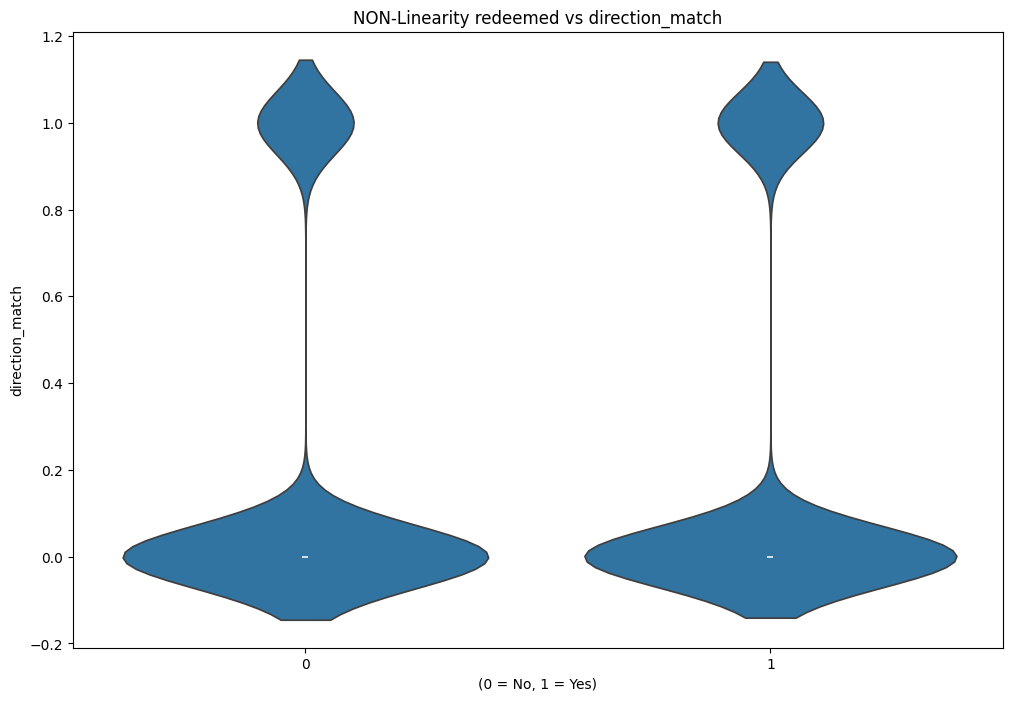

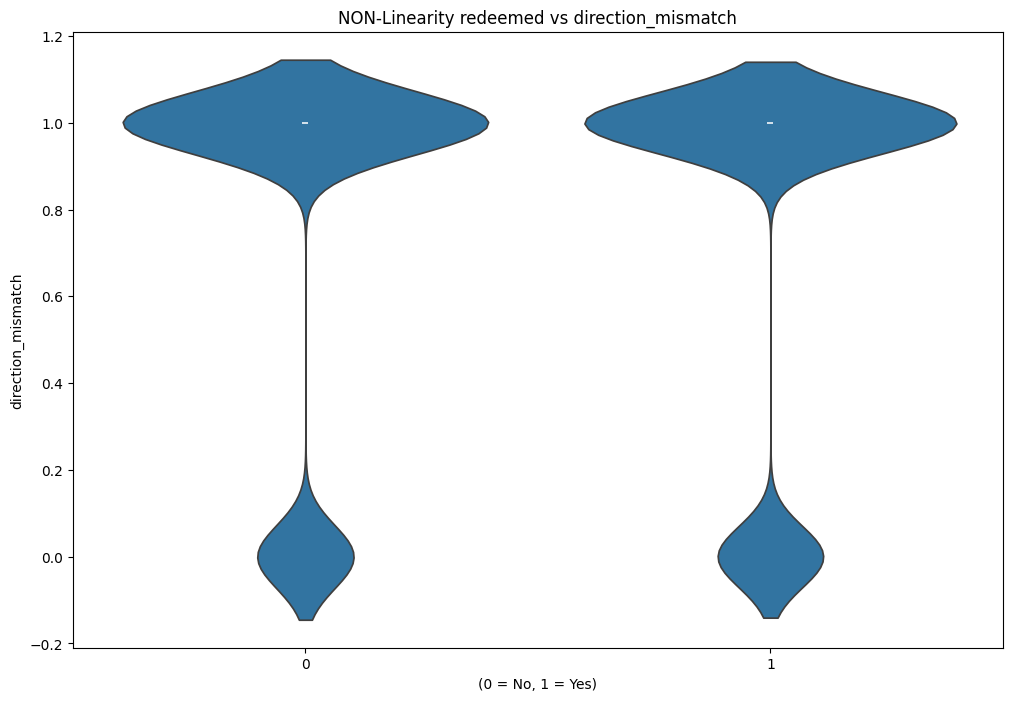

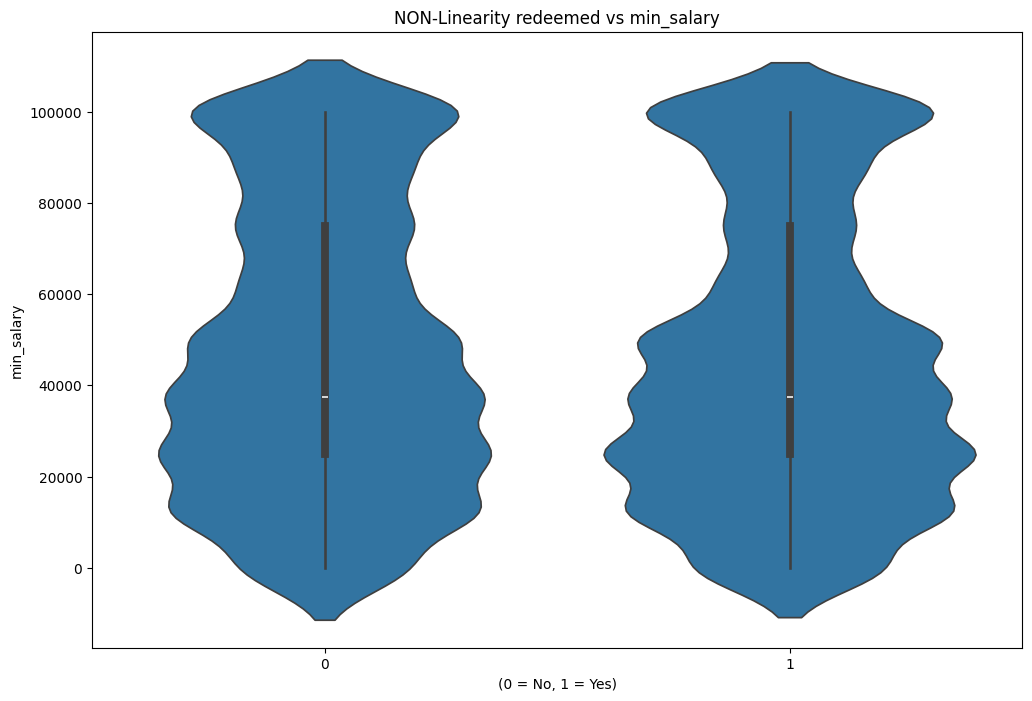

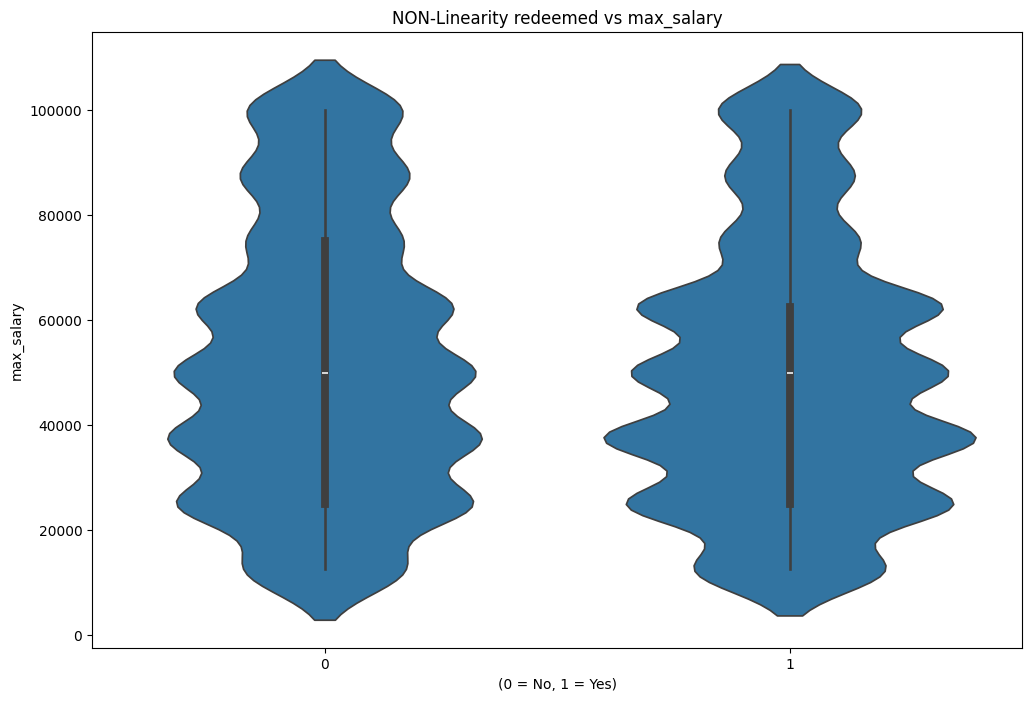

In [ ]:
y_col=[col for col in numerical_columns if col !='redeemed']


for col in y_col:
  plt.figure(figsize=(12,8))
  sns.violinplot(data=data, x='redeemed', y=col)
  plt.title(f"NON-Linearity redeemed vs {col}")
  plt.xlabel('(0 = No, 1 = Yes)')
  plt.ylabel(col)
  plt.show()

##Based on the above violinplot visual we decide that relation with target varible is non-linear

In [ ]:
data.drop(columns=['direction_mismatch','min_salary'],inplace=True)

In [ ]:
data.shape

(12610, 23)

In [ ]:
# handling outliers
# some methods had tried on outliers and fixed best isolation forest because of the data non-linear so best for outliers is isolation forest

iso = IsolationForest(contamination=0.03, random_state=42)
outliers = iso.fit_predict(data.select_dtypes(include=['float64', 'int64']))
data_cleaned = data[outliers == 1]

In [ ]:
data_cleaned.shape

(12231, 23)

In [ ]:
data_cleaned.dtypes

,0
trip_purpose,object
travel_company,object
current_weather,object
ambient_temp,int64
time_of_day,object
offer_type,object
deal_expiry_window,object
user_gender,object
relationship_status,object
num_dependents,int64


In [ ]:
Col_for_OneHotEncoder = ['trip_purpose','travel_company','current_weather','time_of_day','offer_type','deal_expiry_window','relationship_status','num_dependents','user_gender','education_level','age_group']
target_col=['job_type']
numerical_columns=['visit_bar_freq',
    'visit_cafe_freq',
    'visit_takeout_freq',
    'visit_restaurant_low',
    'visit_restaurant_high',
    'min_gap_to_offer_15',
    'min_gap_to_offer_25',
    'direction_match',
    'max_salary'
]

##lets make a pipeline
#PreProcesing Steps

#numerical_transformer

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#categorical_transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

categorical_target_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target', TargetEncoder()),
])



#Combining the preprocessing steps using Column Transformer

Preprocessor =ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
         ('cat_onehot', categorical_transformer, Col_for_OneHotEncoder),
        ('cat_target', categorical_target_transformer, target_col)
    ],
    remainder='passthrough' # Keep other columns if any
)

In [ ]:
x = data_cleaned.drop('redeemed', axis=1)   # Drop the target column from features
y = data_cleaned['redeemed']

In [ ]:
data_final= Preprocessor.fit_transform(x,y)

In [ ]:
data_final.shape

(12231, 51)

In [ ]:
data_final_df = pd.DataFrame(data_final)

In [ ]:
data_final_df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluation for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

# Perform cross-validation (example with Logistic Regression)
print("Performing cross-validation for Logistic Regression...")
lr_scores = cross_val_score(LogisticRegression(max_iter=1000), data_final, y, cv=5)
print(f"Cross-validation scores for Logistic Regression: {lr_scores}")
print(f"Mean CV score for Logistic Regression: {lr_scores.mean()}")

Training LogisticRegression...
Evaluation for LogisticRegression:
              precision    recall  f1-score   support

           0       0.65      0.57      0.61      1055
           1       0.70      0.77      0.73      1392

    accuracy                           0.68      2447
   macro avg       0.68      0.67      0.67      2447
weighted avg       0.68      0.68      0.68      2447

------------------------------
Training RandomForestClassifier...
Evaluation for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1055
           1       0.76      0.80      0.78      1392

    accuracy                           0.74      2447
   macro avg       0.74      0.73      0.74      2447
weighted avg       0.74      0.74      0.74      2447

------------------------------
Training XGBClassifier...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:42:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation for XGBClassifier:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1055
           1       0.77      0.81      0.79      1392

    accuracy                           0.76      2447
   macro avg       0.75      0.75      0.75      2447
weighted avg       0.75      0.76      0.75      2447

------------------------------
Performing cross-validation for Logistic Regression...
Cross-validation scores for Logistic Regression: [0.66571312 0.69174162 0.66475879 0.65004088 0.68111202]
Mean CV score for Logistic Regression: 0.6706732859265655


In [ ]:
rf_scores = cross_val_score(RandomForestClassifier(random_state=42), data_final, y, cv=5)
print("Random Forest CV Scores:", rf_scores)
print("Mean:", rf_scores.mean())

Random Forest CV Scores: [0.69105027 0.70359771 0.6741619  0.64554374 0.71422731]
Mean: 0.6857161855874381


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_scores = cross_val_score(xgb_model, data_final, y, cv=5)
print("XGBoost CV Scores:", xgb_scores)
print("Mean:", xgb_scores.mean())

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost CV Scores: [0.67919902 0.66271464 0.63532298 0.64840556 0.68070319]
Mean: 0.661269076122714


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


##Based on results choosing the randomforestclassifer is best for the model

##But need to do the hyperparameter tunning to get more good result of the model


In [ ]:
#Using hyperparameter tuning using GridSearchCV and apply model RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],          # number of trees
    'max_depth': [None, 10, 20],         # max depth of each tree
    'min_samples_split': [2, 5],         # min samples to split a node
    'min_samples_leaf': [1, 2],          # min samples at a leaf node
    'max_features': ['sqrt', 'log2']     # number of features to consider at each split
}

rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy', # metric to optimize
    n_jobs=-1,          # use all CPU cores
    verbose=2           # print progress messages
)


x_processed = Preprocessor.transform(x)

grid_search.fit(x_processed, y)

print("Best Parameters found:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters found: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.701496551085799


In [ ]:
##Get the best model
best_model = grid_search.best_estimator_

In [ ]:
## Predict using the same data (for learning purpose)
x_processed_for_prediction = Preprocessor.transform(x)
y_pred = best_model.predict(x_processed_for_prediction)

In [ ]:
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:")
print(classification_report(y, y_pred))

Accuracy: 0.8073747036219442
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.76      5272
           1       0.79      0.89      0.84      6959

    accuracy                           0.81     12231
   macro avg       0.81      0.79      0.80     12231
weighted avg       0.81      0.81      0.80     12231



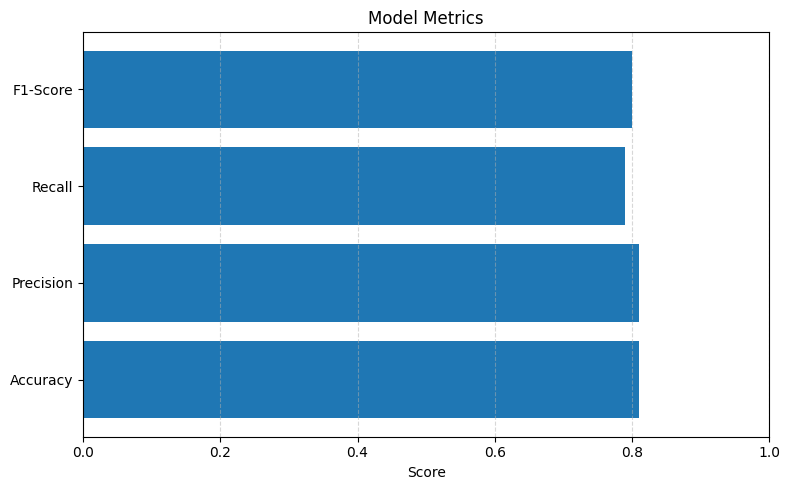

In [ ]:
metrics = {
    'Accuracy': 0.81,
    'Precision': 0.81,
    'Recall': 0.79,
    'F1-Score': 0.80
}

# Separate keys and values
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(metric_names, metric_values)
plt.xlabel("Score")
plt.title("Model Metrics")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Knowing the feature imporatance


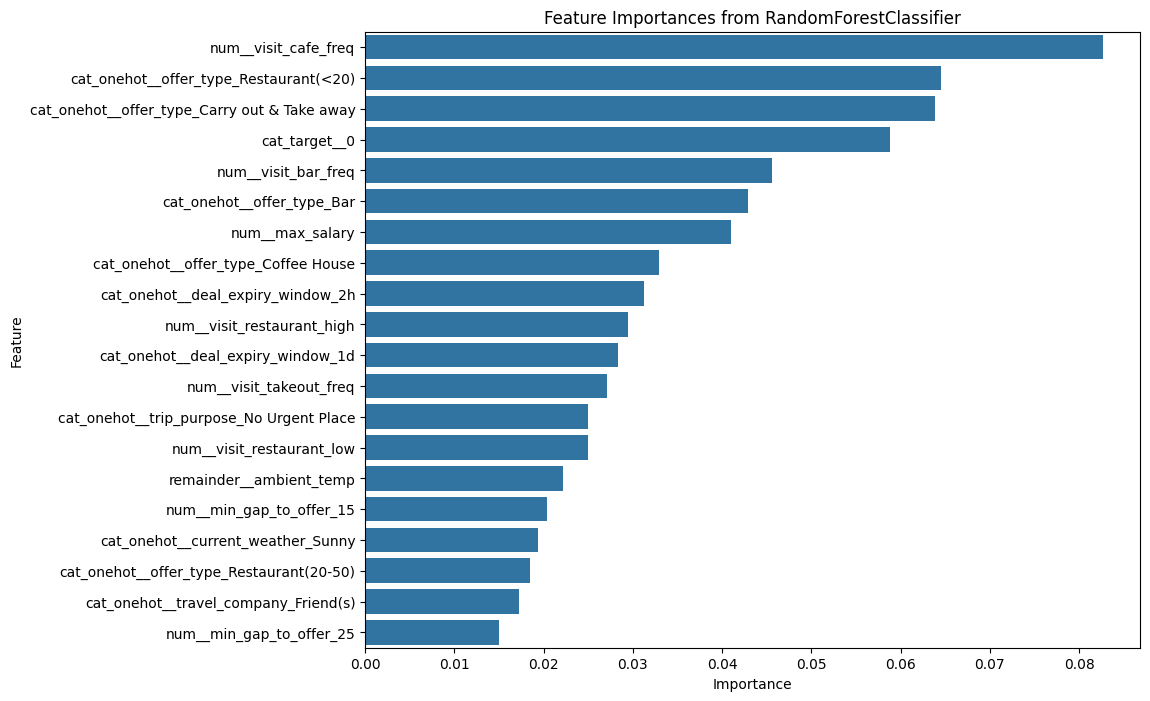

In [ ]:
#Access feature importances
importances = best_model.feature_importances_

# 3. Get feature names from the preprocessor
feature_names = Preprocessor.get_feature_names_out()

# 4. Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# 5. Sort and visualize
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20)) # Display top 20 features
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

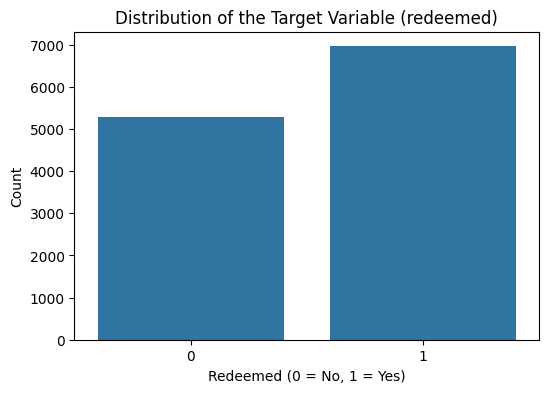

Class distribution of 'redeemed':
redeemed
1    6959
0    5272
Name: count, dtype: int64
Percentage of class 0: 43.10%
Percentage of class 1: 56.90%


In [ ]:
# Checking for class imbalance in the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='redeemed', data=data_cleaned)
plt.title('Distribution of the Target Variable (redeemed)')
plt.xlabel('Redeemed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

redeemed_counts = data_cleaned['redeemed'].value_counts()
print("Class distribution of 'redeemed':")
print(redeemed_counts)
print(f"Percentage of class 0: {redeemed_counts[0] / len(data_cleaned) * 100:.2f}%")
print(f"Percentage of class 1: {redeemed_counts[1] / len(data_cleaned) * 100:.2f}%")

##The class imbalance is mild, it is okay to proceed with the model